# Step 1: Loading Libraries


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Loading the Datasets

In [2]:
census = gpd.read_file("/content/drive/MyDrive/CS896/PLACES__Census_Tract_Data_(GIS_Friendly_Format).csv")
health = pd.read_csv("/content/drive/MyDrive/CS896/PLACES__Local_Data_for_Better_Health,_Census_Tract_Data.csv")
#health = pd.read_csv("/content/drive/MyDrive/CS896/PLACES__Local_Data_for_Better_Health,_Census_Tract_Data.csv", engine='python', on_bad_lines='warn')
zcta = gpd.read_file("/content/drive/MyDrive/CS896/PLACES__ZCTA_Data_(GIS_Friendly_Format).csv")
parcels = gpd.read_file("/content/drive/MyDrive/CS896/PLACES__Local_Data_for_Better_Health,_Place_Data.csv")

#Step 3: Checking the Datasets Structure


In [3]:
census.head()
census.info()

health.head()
health.info()

zcta.head()
zcta.info()

parcels.head()
parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72337 entries, 0 to 72336
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   StateAbbr               72337 non-null  object
 1   StateDesc               72337 non-null  object
 2   CountyName              72337 non-null  object
 3   CountyFIPS              72337 non-null  object
 4   TractFIPS               72337 non-null  object
 5   TotalPopulation         72337 non-null  object
 6   ACCESS2_CrudePrev       72337 non-null  object
 7   ACCESS2_Crude95CI       72337 non-null  object
 8   ARTHRITIS_CrudePrev     72337 non-null  object
 9   ARTHRITIS_Crude95CI     72337 non-null  object
 10  BINGE_CrudePrev         72337 non-null  object
 11  BINGE_Crude95CI         72337 non-null  object
 12  BPHIGH_CrudePrev        72337 non-null  object
 13  BPHIGH_Crude95CI        72337 non-null  object
 14  BPMED_CrudePrev         72337 non-null  object
 15  BP

#Step 4: Summary of Datasets

In [4]:
census.describe()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,COGNITION_Crude95CI,MOBILITY_CrudePrev\t,MOBILITY_Crude95CI,SELFCARE_CrudePrev,SELFCARE_Crude95CI,INDEPLIVE_CrudePrev,INDEPLIVE_Crude95CI,DISABILITY_CrudePrev,DISABILITY_Crude95CI,Geolocation
count,72337,72337,72337,72337,72337,72337,72337,72337,72337,72337,...,72337,72337,72337,72337,72337,72337,72337,72337,72337,72337
unique,51,51,1839,3142,72337,9085,567,12136,473,12201,...,7397,388,7206,186,2098,260,4607,496,14438,72337
top,CA,California,Los Angeles,06037,56045951300,2973,,,,,...,,,,,,,,,,POINT (-104.254357 43.85902408)
freq,8005,8005,2324,2324,1,34,4165,4165,4165,4165,...,4165,4165,4165,4165,4165,4165,4165,4165,4165,1


In [5]:
health.describe()

,Year,CountyFIPS,LocationName,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,2.555113e+06,2.555113e+06,2.555113e+06,2.555112e+06,0.0,0.0,2.555112e+06,2.555112e+06,2.555113e+06
mean,2.020774e+03,2.856690e+04,2.856716e+10,2.835377e+01,NaN,NaN,2.586202e+01,3.093564e+01,2.856716e+10
std,4.184108e-01,1.580379e+04,1.580379e+10,2.534658e+01,NaN,NaN,2.458749e+01,2.604963e+01,1.580379e+10
min,2.020000e+03,1.001000e+03,1.001020e+09,3.000000e-01,NaN,NaN,2.000000e-01,4.000000e-01,1.001020e+09
25%,2.021000e+03,1.601100e+04,1.601194e+10,8.500000e+00,NaN,NaN,7.200000e+00,1.000000e+01,1.601194e+10
50%,2.021000e+03,2.910500e+04,2.910596e+10,1.850000e+01,NaN,NaN,1.570000e+01,2.160000e+01,2.910596e+10
75%,2.021000e+03,4.200300e+04,4.200348e+10,3.860000e+01,NaN,NaN,3.410000e+01,4.350000e+01,4.200348e+10
max,2.021000e+03,5.604500e+04,5.604595e+10,9.790000e+01,NaN,NaN,9.710000e+01,9.840000e+01,5.604595e+10


In [6]:
zcta.describe()

,ZCTA5,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,BINGE_Crude95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,...,COGNITION_Crude95CI,MOBILITY_CrudePrev,MOBILITY_Crude95CI,SELFCARE_CrudePrev,SELFCARE_Crude95CI,INDEPLIVE_CrudePrev,INDEPLIVE_Crude95CI,DISABILITY_CrudePrev,DISABILITY_Crude95CI,Geolocation
count,32409,32409,32409,32409,32409,32409,32409,32409,32409,32409,...,32409,32409,32409,32409,32409,32409,32409,32409,32409,32409
unique,32409,15280,456,7607,454,10255,270,4965,531,11273,...,5627,355,6762,144,1583,202,3324,449,12530,32409
top,99929,104,,,,,,,,,...,,,,3.8,,,,,,POINT (-131.6992663 56.36477625)
freq,1,28,974,974,974,974,974,974,974,974,...,974,974,974,1110,974,974,974,974,974,1


In [7]:
parcels.describe()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
count,2054768,2054768,2054768,2054768,2054768,2054768,2054768,2054768,2054768,2054768,...,2054768,2054768,2054768,2054768,2054768,2054768,2054768,2054768,2054768,2054768
unique,2,51,51,18856,1,5,37,1,2,967,...,2,959,974,9805,28484,28484,5,37,2,37
top,2021,PA,Pennsylvania,Franklin,BRFSS,Health Outcomes,Sleeping less than 7 hours among adults aged >...,%,Crude prevalence,,...,,,,112,POINT (-87.82234517 42.69167717),5523725,HLTHOUT,SLEEP,CrdPrv,Sleep <7 hours
freq,1599234,129518,129518,2220,2054768,718680,56968,2054768,1027384,38539,...,2016229,38539,38539,3034,74,74,718680,56968,1027384,56968


#Step5: Finding Missing Values

In [8]:
census.isna().sum()

,0
StateAbbr,0
StateDesc,0
CountyName,0
CountyFIPS,0
TractFIPS,0
...,...
INDEPLIVE_CrudePrev,0
INDEPLIVE_Crude95CI,0
DISABILITY_CrudePrev,0
DISABILITY_Crude95CI,0


In [9]:
health.isna().sum()

,0
Year,0
StateAbbr,0
StateDesc,0
CountyName,0
CountyFIPS,0
LocationName,0
DataSource,0
Category,0
Measure,0
Data_Value_Unit,0


In [10]:
zcta.isna().sum()

,0
ZCTA5,0
TotalPopulation,0
ACCESS2_CrudePrev,0
ACCESS2_Crude95CI,0
ARTHRITIS_CrudePrev,0
...,...
INDEPLIVE_CrudePrev,0
INDEPLIVE_Crude95CI,0
DISABILITY_CrudePrev,0
DISABILITY_Crude95CI,0


In [11]:
parcels.isna().sum()

,0
Year,0
StateAbbr,0
StateDesc,0
LocationName,0
DataSource,0
Category,0
Measure,0
Data_Value_Unit,0
Data_Value_Type,0
Data_Value,0


#Initial EDA – Health Indicators

In [12]:
#Data conversion from String to Float
census['OBESITY_CrudePrev'] = pd.to_numeric(census['OBESITY_CrudePrev'], errors='coerce')
census['DIABETES_CrudePrev'] = pd.to_numeric(census['DIABETES_CrudePrev'], errors='coerce')
census["ACCESS2_NUM"] = pd.to_numeric(census["ACCESS2_CrudePrev"],errors="coerce")

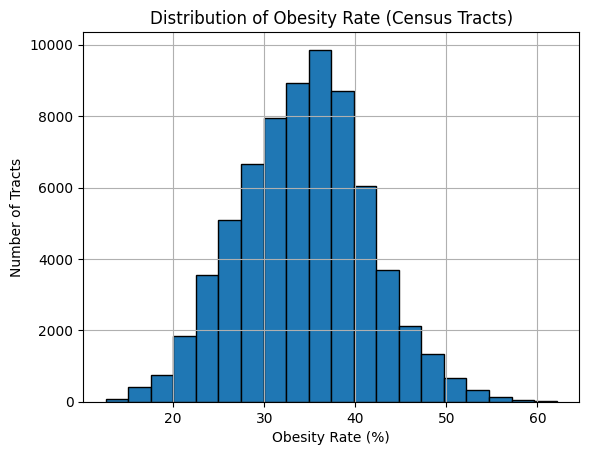

In [13]:
#Histogram: Obesity Rate
plt.figure()
census['OBESITY_CrudePrev'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Obesity Rate (Census Tracts)')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Number of Tracts')
plt.show()

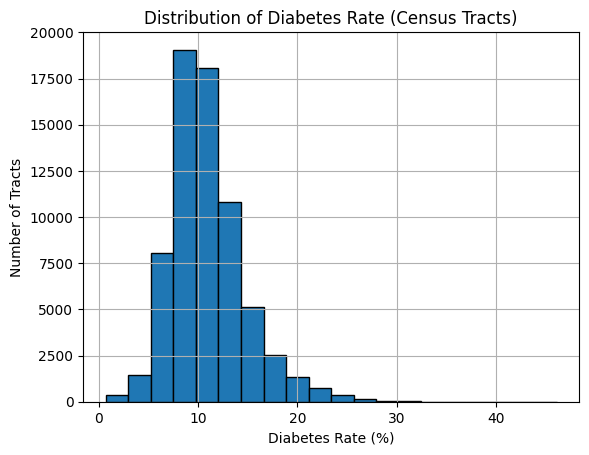

In [14]:
#Histogram: Diabetes Rate
plt.figure()
census['DIABETES_CrudePrev'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Diabetes Rate (Census Tracts)')
plt.xlabel('Diabetes Rate (%)')
plt.ylabel('Number of Tracts')
plt.show()

#EDA – Socioeconomic Variables

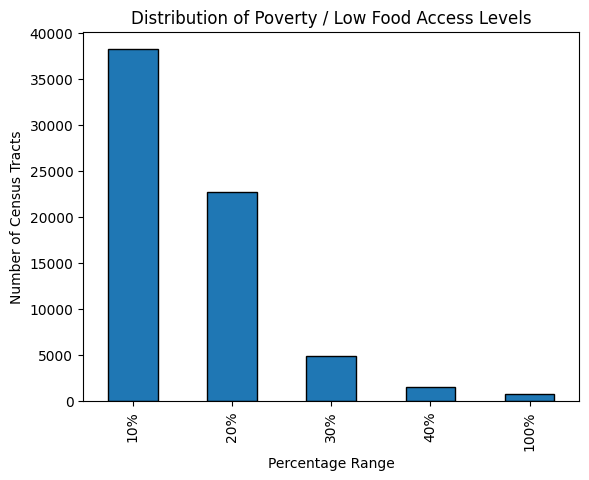

In [15]:
#Bar Chart: Poverty Levels
poverty_bins = pd.cut(
    census["ACCESS2_NUM"],
    bins=[0, 10, 20, 30, 40, 100],
    labels=['10%', '20%', '30%', '40%', '100%'],
    right=True
)
poverty_counts = poverty_bins.value_counts().sort_index()

plt.figure()
poverty_counts.plot(kind="bar", edgecolor='black')
plt.title("Distribution of Poverty / Low Food Access Levels")
plt.xlabel("Percentage Range")
plt.ylabel("Number of Census Tracts")
plt.show()

#Count of Rows and Columns in each Dataset

In [16]:
scale_df = pd.DataFrame({
    "Dataset": ["Parcels", "Census Tracts", "ZCTA", "Health"],
     "Columns": [
        len(parcels.columns),
        len(census.columns),
        len(zcta.columns),
        len(health.columns)
    ],
    "Rows": [
        len(parcels),
        len(census),
        len(zcta),
        len(health)
    ]
})
display(scale_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))

,Dataset,Columns,Rows
0,Parcels,21,2054768
1,Census Tracts,82,72337
2,ZCTA,77,32409
3,Health,23,2555113


#Spatial Comparison

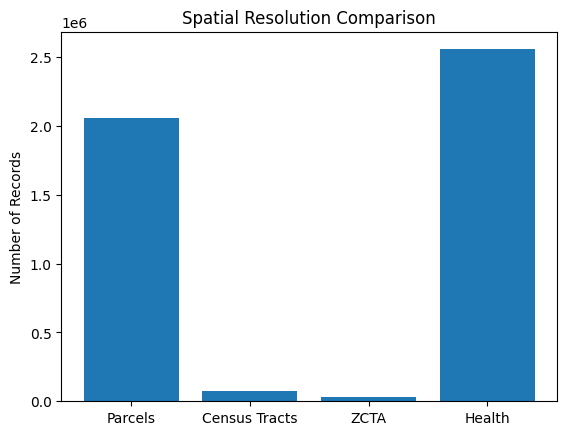

In [17]:
plt.figure()
plt.bar(scale_df["Dataset"], scale_df["Rows"])
plt.title("Spatial Resolution Comparison")
plt.ylabel("Number of Records")
plt.show()

In [18]:
print(type(parcels))
print(type(census))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
